In [1]:
# k-Nearest Neighbors Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\train_data_2.csv")

In [4]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,30,266,1224,1,25,5,2,t,r,n,...,0,0,0,0,0,0,0,0,0,2
1,17,409,12182,2,0,13,7,t,r,n,...,0,0,0,0,0,0,0,0,0,3
2,17,716,7056,2,5,12,6,o,r,q,...,0,0,0,0,0,0,0,0,0,3
3,4,651,105,2,80,5,4,n,r,n,...,0,0,0,0,0,0,0,0,0,2
4,3,1387,3909,5,40,5,10,t,r,n,...,0,0,0,0,0,0,0,0,0,2


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])
train_data["plan_configuration"] = encoder.fit_transform(train_data["plan_configuration"])
train_data["legal_ownership_status"] = encoder.fit_transform(train_data["legal_ownership_status"])



In [7]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,30,266,1224,1,25,5,2,2,2,0,...,0,0,0,0,0,0,0,0,0,2
1,17,409,12182,2,0,13,7,2,2,0,...,0,0,0,0,0,0,0,0,0,3
2,17,716,7056,2,5,12,6,1,2,1,...,0,0,0,0,0,0,0,0,0,3
3,4,651,105,2,80,5,4,0,2,0,...,0,0,0,0,0,0,0,0,0,2
4,3,1387,3909,5,40,5,10,2,2,0,...,0,0,0,0,0,0,0,0,0,2


In [8]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,38].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=511)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=511)

In [11]:
y_pred = classifier.predict(X_test)


C:\Users\Brad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.43      0.04      0.08      4951
           2       0.58      0.95      0.72     29654
           3       0.50      0.09      0.15     17516

    accuracy                           0.57     52121
   macro avg       0.50      0.36      0.32     52121
weighted avg       0.54      0.57      0.47     52121



In [13]:
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']

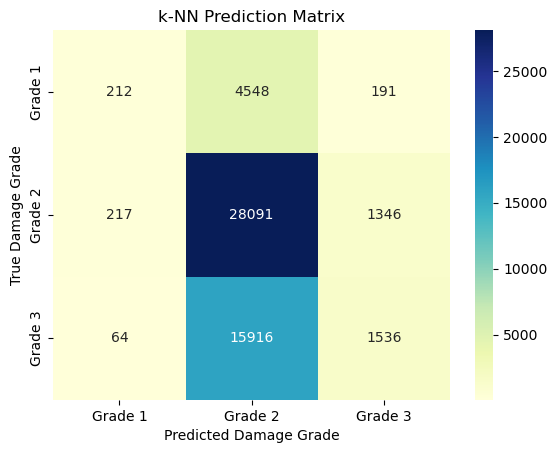

In [17]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("k-NN Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()

In [15]:
classifier2 = KNeighborsClassifier(n_neighbors=700)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=700)

In [16]:
y_pred2 = classifier2.predict(X_test)

KeyboardInterrupt: 

In [ ]:
print(classification_report(y_test, y_pred2))

In [ ]:
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']

In [ ]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("k-NN w/ FS Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()